In [1]:
import os
import librosa
import librosa.display
import IPython.display as idp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
file = '../audio/my-voice.wav'
idp.Audio(file)

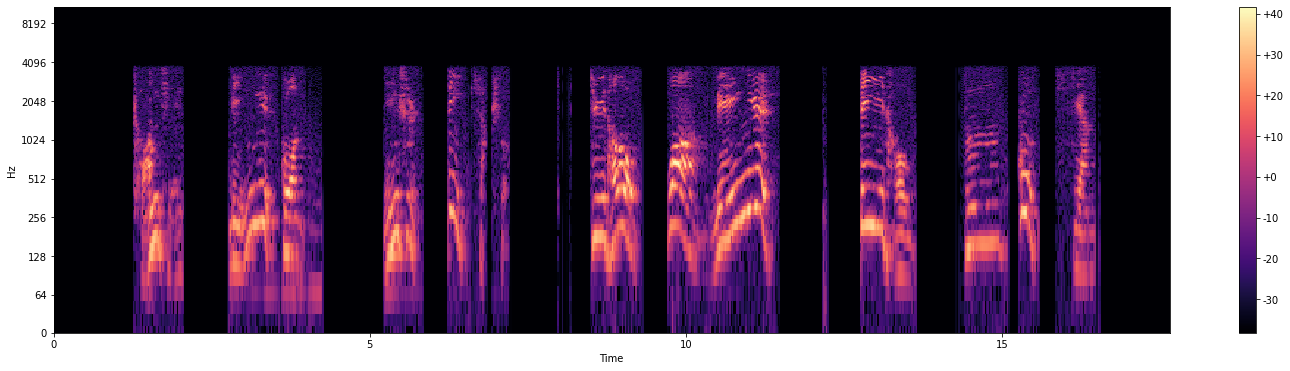

In [8]:
def plot(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25,6))
    librosa.display.specshow(Y, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = y_axis)
    plt.colorbar(format = '%+2.f')

FRAME_SIZE = 1024
HOP_SIZE = 512

wave, sr = librosa.load(file)
S = librosa.stft(wave, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)
Y = np.abs(S) ** 2
Y_log = librosa.power_to_db(Y)

plot(Y_log, sr, HOP_SIZE, y_axis='log')

Max - 13.282332823328234
Min - 103.28323283232832


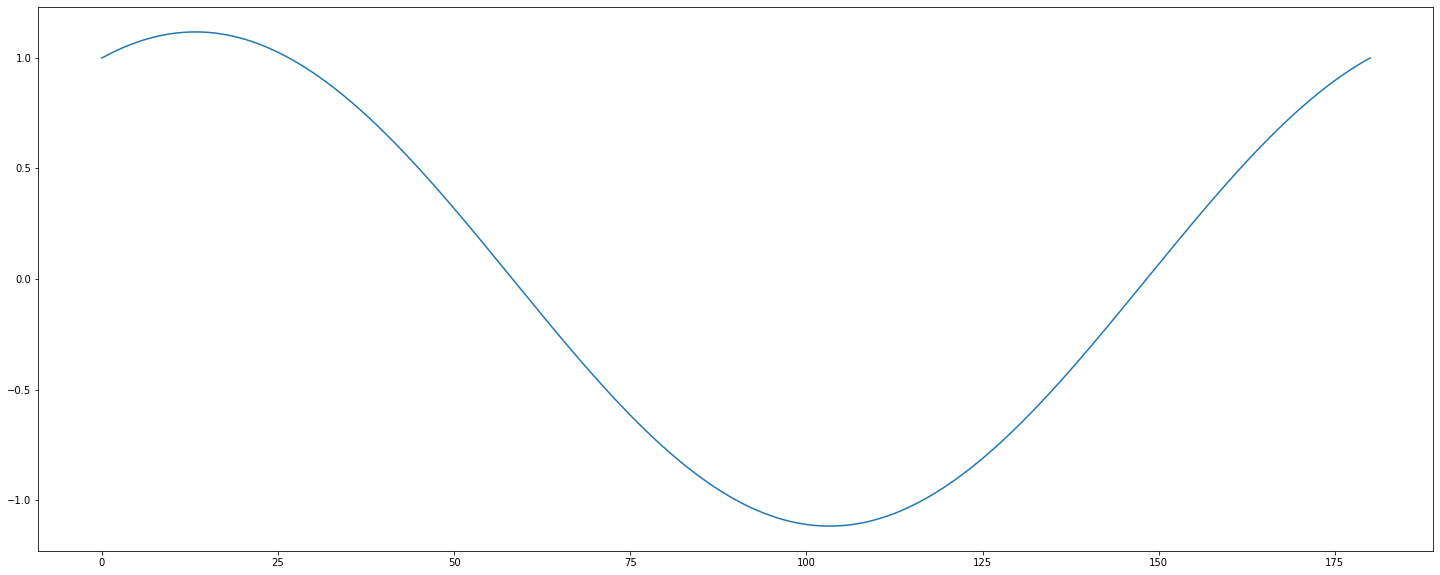

In [56]:
def vv(a):
    return np.cos(a) ** 2 + np.cos(a) * np.sin(a) - np.sin(a) ** 2

N = 100000; delta = (np.pi) / (N - 1); AA = []; RR = []
for i in range(0, N):
    a = i * delta; AA.append(a); RR.append(vv(a))
    
A = np.array(AA); R = np.array(RR)
min_index = np.where(R == np.amin(R)); max_index = np.where(R == np.amax(R))

print(f'Max - {A[max_index[0][0]] * 180 / np.pi}')
print(f'Min - {A[min_index[0][0]] * 180 / np.pi}')

plt.figure(figsize=(25,10)); plt.plot(A * 180 / np.pi, R); plt.show()
